# Let It Flow

by Lina, Martina and Rudi-Renoir

## Summary
1. Inspiration
2. Create Dataset
3. Goal
4. First Tryout - RNN
5. Supervised Learning - Linas Notebooks
6. Unsupervised Learning - Rudis Notebooks
7. Other Models
8. Webapp

## Inspiration

- The Sound of the day-by-day life
- Playfull experience
- Own data, own bias

## Create Dataset

### How we created ...



#### Dataset Overview

- Number of Participants: 3 (Lina, Martina, Rudi)
- Total Clips: 600 short clips (200 per person)
- Recording Device: iPhone with the native app camera
- Duration of Clips: Each clip should be up to 20 seconds long
- Object Used: IKEA glass (each participant will have two identical glasses)
- Water: Tap water, room temperature

- Short: 0-5
- Medium: 5-10 
- Long: 10-15

#### Recording Guidelines
1. Setting:
- Record in a quiet environment to minimize background noise, as we are primarily using the audio from the clips.
- You could aim for [10 – 20 recordings per setup](#why-this-range). This ensures you capture a variety of sound nuances within the same conditions (e.g., slight variations in pouring speed, distance from the glass, etc.) without oversaturating the dataset with too much repetition.
- Pouring Variations: Each participant will pour water into the glass at three distinct speeds:
    - Slow: Gentle, slow pouring. ~5s.
    - Medium: Steady, moderate flow. ~10s.
    - Fast: Rapid pouring, near the limit of what the glass can handle without spilling. ~15s.
    Ensure a clear distinction between these speeds in each clip.

2. Consistency:
- Always use the same IKEA glass model.
- Always fill the same amount of water in the glass at the start.
- Record in different environments, but maintain sound clarity.
- Different pouring angles (straight, diagonal)

3. Environment:
- You can change the recording environment slightly (kitchen, outdoors, etc.), but the sound of the pouring water should remain the focus.
- Recordings should be done with natural, ambient room acoustics, without any additional audio effects.

4. Video Duration:
- Aim for shorter clips (10-20 seconds). The audio needs to capture the entire pouring process, from start to end.

##### Why This Range?:
More than 20 recordings in the exact same setup might lead to diminishing returns, as the model could learn to overfit to specific sound patterns rather than generalize.
Fewer than 10 recordings might miss important subtle variations.

## Create Dataset

 ### ... and how we used

 - RAW
    - Python script build on top of  [Videopy](#videopy) - FFmpeg libraries [here](./Lina/mov2wav_FFmpeg.ipynb)
    - Audios in .wav (Waveform Audio File Format) [format](#what-are-these-formats) with the PCM (Pulse Code Modulation) codec.
 - normalized in 18s
   - cropping and padding

##### VideoPy
- Both VideoPy (MoviePy) and FFmpeg are libraries designed to handle video processing tasks, such as cutting, merging, and manipulating video files. 
- They are both Open-source, Cross-platform, allow scripting and automation for video editing tasks and Supports Multiple Formats.
- We did our script to automate extraction with VideoPy: 
    - High-level abstraction, easier for beginners.
    - Direct integration with Python, making it ideal for Python developers.
    - Simplified video editing tasks (cutting, merging, adding effects, etc.).
    - More suitable for simpler tasks and Python-based automation.
    - Slower performance compared to direct use of FFmpeg.
    - Limited control over low-level video parameters (like codec settings, bitrate).
    - Less flexibility in highly complex video processing tasks.

##### What are these formats?
1. WAV format:
- A popular, uncompressed audio format created by Microsoft and IBM.
- It acts as a container for audio data, meaning it can hold audio in various encoding formats, but it is most commonly used for high-quality, lossless audio.
2. PCM codec:
- Pulse Code Modulation (PCM) is a method used to digitally represent analog signals.
- It is one of the simplest and most widely used audio codecs.
- PCM audio is uncompressed, meaning the audio is captured and stored in its most accurate form, leading to high-quality sound.
- It typically results in large file sizes due to the lack of compression, making it a good choice for applications requiring high-fidelity audio.

## Goal
The goal is to train a machine learning model from a custom dataset of water pouring sounds.

The final system will generate sound triggers based on the pouring speed, potentially creating an orchestral experience in a collaborative web app where multiple users can interact simultaneously.

<img src="IMG_E6F332D41AC3-1.jpg" alt="webapp" width="300"/>

## First Tryout - RNN

Recurrent Neural Networks (RNNs)

Best For: Sequential data, such as audio or time-series data.

**Why RNNs?**

Audio is a form of sequential data, meaning each sound sample is dependent on the previous one. RNNs, especially Long Short-Term Memory (LSTM) networks or Gated Recurrent Units (GRUs), are good at capturing this temporal dependency.
In your case, the speed of pouring is a continuous process, and RNNs are designed to learn patterns in sequences over time.

Check the Notebook [here](./Lina/first_tryout.ipynb)

## Supervised Learning - Linas Notebooks

### Datavis of the RAW
- [The Analysis of the RAW dataset](./Lina/analising_data.ipynb)
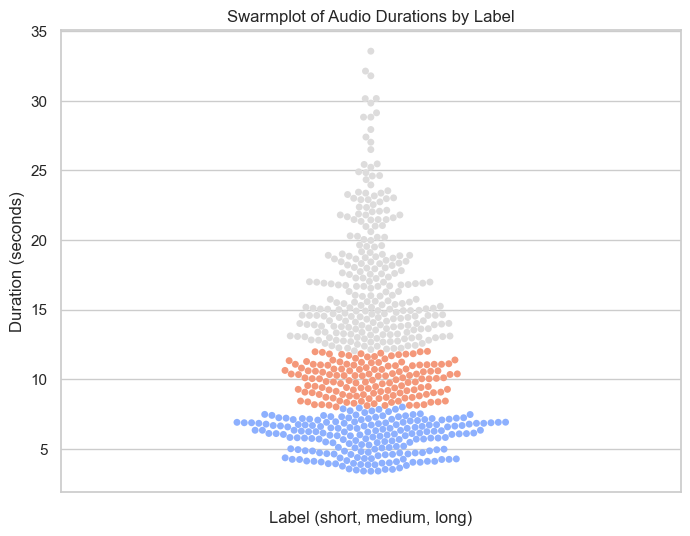


### Datavis of the Normalized Data
- [Cropping and padding the audio filess to the same length 18s](./Lina/normalize_18s.ipynb)
- [The analysis of the normalized data](./Lina/analising_new_dataset.ipynb)


### RNN supervised learning with Pytorch
- [RNN](./Lina/RNN.ipynb)

## Other Models

- The RNN supervised learning when converted/saved in [ONNX](./Lina/ONNX_test.ipynb) didn't perform well (41% of accuracy).
- The [Tensorflow](./Lina/RNN_tensorflow.ipynb) model did a good performance. But it is not possible to convert it to tensorflow.js and keep the performance.

##### Our environment
A quick reminder
- We are using Visual Studio Code with Jupyter Notebook extension.
- Miniforge was installed in our mac OS
- on top of that, from the Miniforge prompt, was installed:
    - mamba create -n aicp python=3.10 numpy pandas pytorch torchvision torchaudio cpuonly seaborn scikit-learn scikit-image pillow jupyter jupyterlab ipywidgets tqdm transformers librosa umap-learn plotly -c conda-forge -c pytorch
    - pip install soundcard